# Scraping the ADO Program page

## 1. Building the scraper

In [1]:
# Accessing the page where the full list of the ADO athletes is
from urllib.request import urlopen
html_str = urlopen("http://www.coe.es/ADO/ado09.nsf/de000d1322082c17c1257ddc005a8d36?SearchView&Query=(2016)&Start=1&Count=171&SearchOrder=4").read()

In [2]:
# Parsing the data
from bs4 import BeautifulSoup
document = BeautifulSoup(html_str, "html.parser")

In [3]:
# Extracting each athlete's basic info and the URL that contains additional info
# This 'dummy' dictionary creates an index to be used later
switch_dict = {
    '0': 'Nombre',
    '1': 'Deporte',
    '2': 'Prueba',
    '3': 'Nacimiento',
    '4': 'URL'
}

data = []

table = document.find(id='tabla-becados')

# Accessing the table rows 
for row in table.find_all('tr'):
    data_object = {}
    # Unpacking the index and values for each <td> tag
    # The 'keys' and their 'values' haven't been given a unique class
    # So we use 'enumerate' to pair them as tuples, based on the 'dummy' dict above
    for i,cell in enumerate(row.find_all('td')):
        # The URL for each athlete is index 4 in the 'dummy' dict
        if i == 4:
            data_object[switch_dict[str(i)]] = cell.find('a').get('href')
        else:
            data_object[switch_dict[str(i)]] = cell.string
    data.append(data_object)
data

[{'Deporte': 'Tiro con Arco',
  'Nacimiento': 'Comunidad de Madrid',
  'Nombre': 'Adriana Rosa Martín Lázaro',
  'Prueba': 'Equipos 70 m',
  'URL': 'http://www.coe.es/coe/bd_perso.nsf/becadosHTML/0077EB90D25E9064C1257C22004BE7C7?opendocument'},
 {'Deporte': 'Voleibol',
  'Nacimiento': 'Andalucía',
  'Nombre': 'Adrián Gavira Collado',
  'Prueba': 'Voley Playa',
  'URL': 'http://www.coe.es/coe/bd_perso.nsf/becadosHTML/D573DCBF6004349BC125742D004E55C8?opendocument'},
 {'Deporte': 'Remo',
  'Nacimiento': 'Cataluña',
  'Nombre': 'Aina Cid i Centelles',
  'Prueba': 'Dos sin Timonel',
  'URL': 'http://www.coe.es/coe/bd_perso.nsf/becadosHTML/A50E87748D22CB73C1257FA100533EA9?opendocument'},
 {'Deporte': 'Triatlón',
  'Nacimiento': 'País Vasco',
  'Nombre': 'Ainhoa Murua Zubizarreta',
  'Prueba': 'Individual',
  'URL': 'http://www.coe.es/coe/bd_perso.nsf/becadosHTML/4323D655CC892EFCC1256DC8005DD091?opendocument'},
 {'Deporte': 'Natación',
  'Nacimiento': 'Comunidad de Madrid',
  'Nombre': 'Aitor

In [4]:
# The gender information is not available in any of the scraped pages
# Creating a new list with the name of each athlete to add their gender manually in Excel
name_list =[] 
for item in data:
    name = item['Nombre']
    name_list.append(name)
len(name_list)

171

In [5]:
import pandas as pd

name_df = pd.DataFrame(name_list)
name_df.head()

,0
0,Adriana Rosa Martín Lázaro
1,Adrián Gavira Collado
2,Aina Cid i Centelles
3,Ainhoa Murua Zubizarreta
4,Aitor Martínez Rodríguez


In [6]:
name_df.to_csv('names.csv')

In [7]:
df = pd.read_excel('names2.xls')
df.head()

,name,gender
0,Adriana Rosa MartÌ_n LÌÁzaro,mujer
1,AdriÌÁn Gavira Collado,hombre
2,Aina Cid i Centelles,mujer
3,Ainhoa Murua Zubizarreta,mujer
4,Aitor MartÌ_nez RodrÌ_guez,hombre


In [8]:
# To solve encoding problems, the 'name' column is taken from the first .csv
df['Nombre'] = name_df[0]

In [9]:
df.head()

,name,gender,Nombre
0,Adriana Rosa MartÌ_n LÌÁzaro,mujer,Adriana Rosa Martín Lázaro
1,AdriÌÁn Gavira Collado,hombre,Adrián Gavira Collado
2,Aina Cid i Centelles,mujer,Aina Cid i Centelles
3,Ainhoa Murua Zubizarreta,mujer,Ainhoa Murua Zubizarreta
4,Aitor MartÌ_nez RodrÌ_guez,hombre,Aitor Martínez Rodríguez


In [10]:
# del df['name']

In [11]:
# Converting the df into a dict (like the rest of data)
gender_dict = df.to_dict(orient='index')

In [12]:
gender_dict

{0: {'Nombre': 'Adriana Rosa Martín Lázaro', 'gender': 'mujer'},
 1: {'Nombre': 'Adrián Gavira Collado', 'gender': 'hombre'},
 2: {'Nombre': 'Aina Cid i Centelles', 'gender': 'mujer'},
 3: {'Nombre': 'Ainhoa Murua Zubizarreta', 'gender': 'mujer'},
 4: {'Nombre': 'Aitor Martínez Rodríguez', 'gender': 'hombre'},
 5: {'Nombre': 'Alba María Cabello Rodilla', 'gender': 'mujer'},
 6: {'Nombre': 'Albert Hermoso Farras', 'gender': 'hombre'},
 7: {'Nombre': 'Albert Puig Garrich', 'gender': 'hombre'},
 8: {'Nombre': 'Alberto Fernández Muñoz', 'gender': 'hombre'},
 9: {'Nombre': 'Alejandra Quereda Flores', 'gender': 'mujer'},
 10: {'Nombre': 'Alesandra Aguilar Morán', 'gender': 'mujer'},
 11: {'Nombre': 'Alexander Ingvar Sigurbjornsson Benet', 'gender': 'hombre'},
 12: {'Nombre': 'Alfonso Benavides López de Ayala', 'gender': 'hombre'},
 13: {'Nombre': 'Ander Elosegi Alkain', 'gender': 'hombre'},
 14: {'Nombre': 'Andrés Eduardo Mata Pérez', 'gender': 'hombre'},
 15: {'Nombre': 'Ane Santesteban Gon

In [12]:
# The 'gender_dict' has to be merged with the 'data' list above
# It has to become a list as well
gender_list = []
for i in range(len(gender_dict)):
    gender = gender_dict[i]
    gender_list.append(gender)
gender_list

[{'Nombre': 'Adriana Rosa Martín Lázaro', 'gender': 'mujer'},
 {'Nombre': 'Adrián Gavira Collado', 'gender': 'hombre'},
 {'Nombre': 'Aina Cid i Centelles', 'gender': 'mujer'},
 {'Nombre': 'Ainhoa Murua Zubizarreta', 'gender': 'mujer'},
 {'Nombre': 'Aitor Martínez Rodríguez', 'gender': 'hombre'},
 {'Nombre': 'Alba María Cabello Rodilla', 'gender': 'mujer'},
 {'Nombre': 'Albert Hermoso Farras', 'gender': 'hombre'},
 {'Nombre': 'Albert Puig Garrich', 'gender': 'hombre'},
 {'Nombre': 'Alberto Fernández Muñoz', 'gender': 'hombre'},
 {'Nombre': 'Alejandra Quereda Flores', 'gender': 'mujer'},
 {'Nombre': 'Alesandra Aguilar Morán', 'gender': 'mujer'},
 {'Nombre': 'Alexander Ingvar Sigurbjornsson Benet', 'gender': 'hombre'},
 {'Nombre': 'Alfonso Benavides López de Ayala', 'gender': 'hombre'},
 {'Nombre': 'Ander Elosegi Alkain', 'gender': 'hombre'},
 {'Nombre': 'Andrés Eduardo Mata Pérez', 'gender': 'hombre'},
 {'Nombre': 'Ane Santesteban González', 'gender': 'mujer'},
 {'Nombre': 'Anna Boada Pe

In [13]:
# This function allows me to merge both lists and get rid of the redundant elements after the merge
# Source: https://mmxgroup.net/2012/04/12/merging-python-list-of-dictionaries-based-on-specific-key/
def merge_lists(l1, l2, key):
    merged = {}
    for item in l1+l2:
        if item[key] in merged:
            merged[item[key]].update(item)
        else:
            merged[item[key]] = item
    return [val for (_, val) in merged.items()]
            

In [14]:
# Merging both lists into one
data_list = merge_lists(data, gender_list, 'Nombre')

In [15]:
data_list[2]

{'Deporte': 'Piragüismo',
 'Nacimiento': 'País Vasco',
 'Nombre': 'Maialen Chourraut Yurramendi',
 'Prueba': 'K1',
 'URL': 'http://www.coe.es/coe/bd_perso.nsf/becadosHTML/7BF83DC513CB0053C1256DD00037E4C1?opendocument',
 'gender': 'mujer'}

In [16]:
players_list = []
  
h4_list = []
p_list = []

results_list = []

becas_list = []


# Iterating through every URL for each athlete
for athlete in data_list:
    # Extracting the basic info for each athlete
    player_page = urlopen(athlete['URL']).read()
    document = BeautifulSoup(player_page, "html.parser")
    info = document.find('div', {'class':'contenedor-info-ficha'}) 
  
    # Extracting the keys
    for h4 in info.find_all('h4', {'class':'ficha-item'}):
        h4_tag = h4.string
        h4_list.append(h4_tag)
        
    # Extracting the values
    for p in info.find_all('p', {'class':'ficha-item-valor'}):
        p_tag = p.string
        p_list.append(p_tag)

    # Extracting the results for each competition 
    # Adding the headers manually (since it seems the easiest way)
    headers = document.find('table', {'id':'tabla-uno'})
   
    olympic_game_rows = headers.find_all('tr')
    for row in olympic_game_rows:
        try:
            olympic_cells = row.find_all('td')
            datapoint = {
                'Competición': 'JJOO',
                'Nombre': athlete['Nombre'],
                'Campeonato': olympic_cells[0].string,
                'Deporte': olympic_cells[1].string,
                'Prueba': olympic_cells[2].string,
                'Resultado': olympic_cells[3].string,
                'Clasificación': olympic_cells[4].string
            }
            # getting rid of the duplicates that this scraper generates
            if datapoint in results_list:
                pass
            else:
                results_list.append(datapoint)
        except:
            None 
        
        
    world_champs = document.find('table', {'id':'tabla-dos'})
    
    world_champs_rows = world_champs.find_all('tr')
    for row in world_champs_rows:
        try:
            world_champs_cells = row.find_all('td')
            datapoint = {
            'Competición': 'Campeonato del mundo',
            'Nombre': athlete['Nombre'],
            'Campeonato': world_champs_cells[0].string,
            'Deporte': world_champs_cells[1].string,
            'Prueba': world_champs_cells[2].string,
            'Resultado': world_champs_cells[3].string,
            'Clasificación': world_champs_cells[4].string
            }
            if datapoint in results_list:
                pass
            else:
                results_list.append(datapoint)
        except:
            None
    
    eu_champs = document.find('table', {'id':'tabla-tres'})
    
    eu_champs_rows = eu_champs.find_all('tr')
    for row in eu_champs_rows:
        try:
            eu_champs_cells = row.find_all('td')
            datapoint = {
            'Competición': 'Campeonato de Europa',
            'Nombre': athlete['Nombre'],
            'Campeonato': eu_champs_cells[0].string,
            'Deporte': eu_champs_cells[1].string,
            'Prueba': eu_champs_cells[2].string,
            'Resultado': eu_champs_cells[3].string,
            'Clasificación': eu_champs_cells[4].string
            }
            if datapoint in results_list:
                pass
            else:
                results_list.append(datapoint)
        except:
            None
        
    # Extracting the data for the grants
    becas_rows = document.find('ul')
    
    for row in becas_rows.find_all('li'):
        datapoint = {
            'Nombre': athlete['Nombre'],
            'Año': row.string
        }
        becas_list.append(datapoint)
            
# Appending the keys and values for the basic info of each athlete to a dict
# Then to the main list        
zipped1 = zip(h4_list, p_list)
for z in zipped1:
    player_dict = {}
    player_dict[z[0]]= z[1]
    players_list.append(player_dict)        

        

## 2. Creating the dataframes

In [17]:
athletes_df = pd.DataFrame(data_list)

In [18]:
athletes_df.head()

,Deporte,Nacimiento,Nombre,Prueba,URL,gender
0,Judo,Andalucía,Julia Figueroa Peña,-48 kg,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer
1,Natación,Cataluña,Paula Ramírez i Ibáñez,Equipos,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer
2,Piragüismo,País Vasco,Maialen Chourraut Yurramendi,K1,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer
3,Atletismo,Cantabria,Paula González Berodia,Maratón,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer
4,Ciclismo,País Vasco,Ane Santesteban González,Carrera en línea,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer


In [19]:
results_df  = pd.DataFrame(results_list)

In [20]:
results_df.head()

,Campeonato,Clasificación,Competición,Deporte,Nombre,Prueba,Resultado
0,Río 2016,9º,JJOO,Judo,Julia Figueroa Peña,-48 kg (Súper ligero) Mujeres (Eliminatorias ),(ESP 000s1 - CUB 011) Elim
1,JU ASTANA 2015,None,Campeonato del mundo,Judo,Julia Figueroa Peña,-48 kg (Súper ligero) Mujeres (1/16 de Final ),(ESP 000 - KOR 100) Elim
2,JU KAZAN 2016,None,Campeonato de Europa,Judo,Julia Figueroa Peña,-48 kg (Súper ligero) Mujeres (1/16 de Final ),(ESP 000 - RUS 100) Elim
3,JU MONTPELIER 2014,7º :Diploma,Campeonato de Europa,Judo,Julia Figueroa Peña,-48 kg (Súper ligero) Mujeres (Final de Repes...,(ESP 0000 - ITA 0000)
4,SY KAZAN 2015,5º :Diploma,Campeonato del mundo,Natación / Sincronizada,Paula Ramírez i Ibáñez,Equipos Equipos Programa Técnico Mujeres (Fina...,(0.0)


In [21]:
# Merging both dataframes in one
final_df = pd.merge(athletes_df, results_df, on='Nombre')

In [23]:
final_df.head()

,Deporte_x,Nacimiento,Nombre,Prueba_x,URL,gender,Campeonato,Clasificación,Competición,Deporte_y,Prueba_y,Resultado
0,Atletismo,Aragón,María José Povés Novella,20 km Marcha,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,Londres 2012,12º,JJOO,Atletismo,Ruta 20 km Marcha Mujeres (Final ),(01:29:36.01)
1,Atletismo,Aragón,María José Povés Novella,20 km Marcha,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,Pekín 2008,18º,JJOO,Atletismo,Ruta 20 km Marcha Mujeres (Final ),(1:30:52.0)
2,Atletismo,Aragón,María José Povés Novella,20 km Marcha,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,AT ROMA 2016,None,Campeonato del mundo,Atletismo / Ruta,20 km Marcha Mujeres (Final ),(0.00) DNF
3,Atletismo,Aragón,María José Povés Novella,20 km Marcha,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,AT BEIJING 2015 Ruta,10º,Campeonato del mundo,Atletismo / Ruta,20 km Marcha Mujeres (Final ),(1:31:06.00)
4,Atletismo,Aragón,María José Povés Novella,20 km Marcha,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,AT DAEGU 2011,None,Campeonato del mundo,Atletismo,Ruta 20 km Marcha Mujeres (Final ),(0.00) DQ


In [22]:
# del final_df['Deporte_x']

In [23]:
 # del final_df['Prueba_x']

In [24]:
final_df.head()

,Nacimiento,Nombre,URL,gender,Campeonato,Clasificación,Competición,Deporte_y,Prueba_y,Resultado
0,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,Río 2016,9º,JJOO,Judo,-48 kg (Súper ligero) Mujeres (Eliminatorias ),(ESP 000s1 - CUB 011) Elim
1,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,JU ASTANA 2015,None,Campeonato del mundo,Judo,-48 kg (Súper ligero) Mujeres (1/16 de Final ),(ESP 000 - KOR 100) Elim
2,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,JU KAZAN 2016,None,Campeonato de Europa,Judo,-48 kg (Súper ligero) Mujeres (1/16 de Final ),(ESP 000 - RUS 100) Elim
3,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,JU MONTPELIER 2014,7º :Diploma,Campeonato de Europa,Judo,-48 kg (Súper ligero) Mujeres (Final de Repes...,(ESP 0000 - ITA 0000)
4,Cataluña,Paula Ramírez i Ibáñez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,mujer,SY KAZAN 2015,5º :Diploma,Campeonato del mundo,Natación / Sincronizada,Equipos Equipos Programa Técnico Mujeres (Fina...,(0.0)


In [25]:
final_df['Género'] = final_df['gender']
final_df['Deporte'] = final_df['Deporte_y']
final_df['Prueba'] = final_df['Prueba_y']

In [26]:
# del final_df['gender']

In [27]:
# del final_df['Deporte_y']

In [28]:
# del final_df['Prueba_y']

In [29]:
final_df.tail()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
1899,Cataluña,Helena Casas Roige,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,CT GRENCHEN 2015,4º :Diploma,Campeonato de Europa,(0.00),mujer,Ciclismo / Pista,Velocidad por Equipos (Team Sprint) Mujeres (...
1900,Cataluña,Helena Casas Roige,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,CT GRENCHEN 2015,8º :Diploma,Campeonato de Europa,(11.697),mujer,Ciclismo / Pista,Velocidad (Sprint) Mujeres (Clasificación 5-1...
1901,Cataluña,Helena Casas Roige,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,CT GRENCHEN 2015,9º,Campeonato de Europa,(ESP 0 - 0),mujer,Ciclismo / Pista,Keirin (Keirin) Mujeres (Final )
1902,Cataluña,Helena Casas Roige,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,CT APELDOORN 2013,5º :Diploma,Campeonato de Europa,(0.00),mujer,Ciclismo / Pista,Velocidad por Equipos (Team Sprint) Mujeres (...
1903,Cataluña,Helena Casas Roige,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,CT APELDOORN 2013,8º :Diploma,Campeonato de Europa,(ESP 0 - 0),mujer,Ciclismo / Pista,Keirin (Keirin) Mujeres (Final )


In [30]:
# Cleaning the values for the classification column
final_df['Clasificación'] = final_df['Clasificación'].str.split(':').str.get(0)

In [31]:
final_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
0,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,9º,JJOO,(ESP 000s1 - CUB 011) Elim,mujer,Judo,-48 kg (Súper ligero) Mujeres (Eliminatorias )
1,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,JU ASTANA 2015,None,Campeonato del mundo,(ESP 000 - KOR 100) Elim,mujer,Judo,-48 kg (Súper ligero) Mujeres (1/16 de Final )
2,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,JU KAZAN 2016,None,Campeonato de Europa,(ESP 000 - RUS 100) Elim,mujer,Judo,-48 kg (Súper ligero) Mujeres (1/16 de Final )
3,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,JU MONTPELIER 2014,7º,Campeonato de Europa,(ESP 0000 - ITA 0000),mujer,Judo,-48 kg (Súper ligero) Mujeres (Final de Repes...
4,Cataluña,Paula Ramírez i Ibáñez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SY KAZAN 2015,5º,Campeonato del mundo,(0.0),mujer,Natación / Sincronizada,Equipos Equipos Programa Técnico Mujeres (Fina...


In [32]:
# More cleaning!
# And converting the strings into integers
def clas_to_int(clas_str):
    if clas_str == None:
        pass
    else:
        return int(clas_str.replace("º", ""))

In [33]:
final_df['Clasificación'] = final_df['Clasificación'].apply(clas_to_int)

In [34]:
final_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
0,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,9.0,JJOO,(ESP 000s1 - CUB 011) Elim,mujer,Judo,-48 kg (Súper ligero) Mujeres (Eliminatorias )
1,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,JU ASTANA 2015,NaN,Campeonato del mundo,(ESP 000 - KOR 100) Elim,mujer,Judo,-48 kg (Súper ligero) Mujeres (1/16 de Final )
2,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,JU KAZAN 2016,NaN,Campeonato de Europa,(ESP 000 - RUS 100) Elim,mujer,Judo,-48 kg (Súper ligero) Mujeres (1/16 de Final )
3,Andalucía,Julia Figueroa Peña,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,JU MONTPELIER 2014,7.0,Campeonato de Europa,(ESP 0000 - ITA 0000),mujer,Judo,-48 kg (Súper ligero) Mujeres (Final de Repes...
4,Cataluña,Paula Ramírez i Ibáñez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SY KAZAN 2015,5.0,Campeonato del mundo,(0.0),mujer,Natación / Sincronizada,Equipos Equipos Programa Técnico Mujeres (Fina...


In [35]:
# Saving all these data to a .csv
final_df.to_csv('athletes_data.csv')

In [36]:
# Checking everything is ok
female_count = []
for item in data_list:
    if item['gender'] == 'mujer':
        female_count.append(item)
    else:
        pass

In [37]:
male_count = []
for item in data_list:
    if item['gender'] == 'hombre':
        male_count.append(item)
    else:
        pass

In [38]:
len(data_list)

171

In [39]:
len(female_count)

80

In [40]:
len(male_count)

91

## 3. Plotting the (first) results

### How many medals has each gender won?

In [41]:
# A new dataframe for the athletes than have won medals
total_medals_df = final_df[(final_df['Clasificación'] <= 3)]

In [42]:
import matplotlib.pyplot as plt
% matplotlib inline

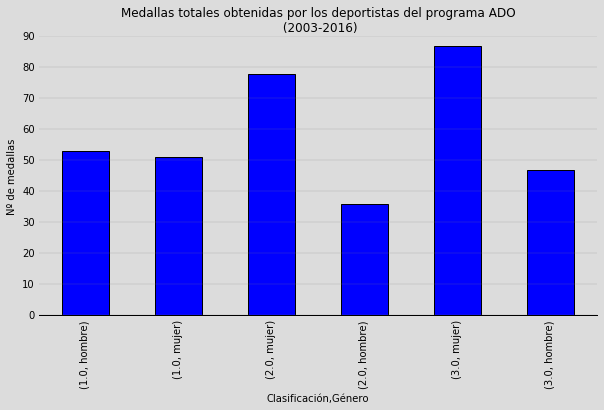

In [45]:
fig, ax = plt.subplots()

fig.set_facecolor('gainsboro')
ax.set_axis_bgcolor('gainsboro')

total_medals_df.groupby('Clasificación')['Género'].value_counts().plot.bar(ax=ax, figsize=(10,5))

ax.yaxis.grid(which='major', color='grey', linestyle='-', linewidth=0.2)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major',
    top='off', 
    left='off',
    right='off',
    bottom='off',
    labelright='off', 
    labeltop='off',
    labelbottom='on')

ax.set_title("Medallas totales obtenidas por los deportistas del programa ADO\n (2003-2016)")
ax.set_ylabel("Nº de medallas")

plt.savefig("medallas_total.pdf")

In [46]:
# A dataframe for those who have a won medals in Olympic Games
jjoo_df = final_df[(final_df['Competición'] == 'JJOO') & (final_df['Clasificación'] <= 3)]

In [47]:
jjoo_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
56,Grecia,Artemi Gavezou Castro,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,2.0,JJOO,(0.0),mujer,Gimnasia / Rítmica,Concurso I Conjuntos (Group Competition) Mujer...
270,Cataluña,Gemma Mengual Civil,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Pekín 2008,2.0,JJOO,(0.0),mujer,Natación / Sincronizada,Dúos (Duets) Mujeres (Programa Libre Final )
271,Cataluña,Gemma Mengual Civil,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Pekín 2008,2.0,JJOO,(0.0),mujer,Natación / Sincronizada,Equipos Mujeres (Programa Libre )
301,Cataluña,Clara Basiana Cañellas,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Londres 2012,3.0,JJOO,(0.0),mujer,Natación / Sincronizada,Equipos Mujeres (Programa Libre )
312,Cantabria,Ruth Beitia Vila,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,1.0,JJOO,(1.97),mujer,Atletismo / Pista Aire Libre,Saltos Altura Mujeres (Final )


In [48]:
# Stripping the year from the Olympic Games' names
jjoo_df['Año'] = jjoo_df['Campeonato'].str.split(' ').str.get(1)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
jjoo_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba,Año
56,Grecia,Artemi Gavezou Castro,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,2.0,JJOO,(0.0),mujer,Gimnasia / Rítmica,Concurso I Conjuntos (Group Competition) Mujer...,2016
270,Cataluña,Gemma Mengual Civil,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Pekín 2008,2.0,JJOO,(0.0),mujer,Natación / Sincronizada,Dúos (Duets) Mujeres (Programa Libre Final ),2008
271,Cataluña,Gemma Mengual Civil,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Pekín 2008,2.0,JJOO,(0.0),mujer,Natación / Sincronizada,Equipos Mujeres (Programa Libre ),2008
301,Cataluña,Clara Basiana Cañellas,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Londres 2012,3.0,JJOO,(0.0),mujer,Natación / Sincronizada,Equipos Mujeres (Programa Libre ),2012
312,Cantabria,Ruth Beitia Vila,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,1.0,JJOO,(1.97),mujer,Atletismo / Pista Aire Libre,Saltos Altura Mujeres (Final ),2016


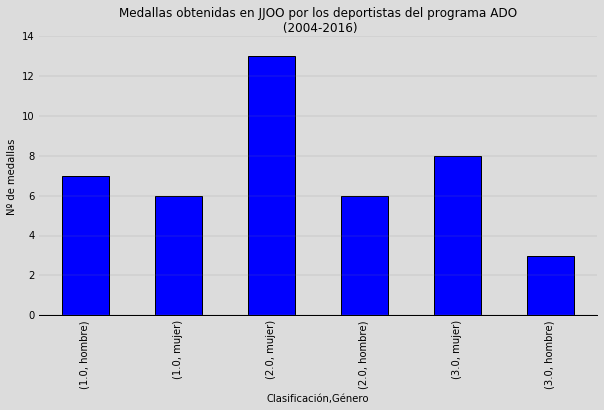

In [50]:
fig, ax = plt.subplots()

fig.set_facecolor('gainsboro')
ax.set_axis_bgcolor('gainsboro')

jjoo_df.groupby('Clasificación')['Género'].value_counts().plot.bar(ax=ax, figsize=(10,5))

ax.yaxis.grid(which='major', color='grey', linestyle='-', linewidth=0.2)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major',
    top='off', 
    left='off',
    right='off',
    bottom='off',
    labelright='off', 
    labeltop='off',
    labelbottom='on')

ax.set_title("Medallas obtenidas en JJOO por los deportistas del programa ADO\n (2004-2016)")
ax.set_ylabel("Nº de medallas")

plt.savefig("medallas_JJOO.pdf")

In [51]:
# A dataframe for those who have a won medals in World Championships
world_df = final_df[(final_df['Competición'] == 'Campeonato del mundo') & (final_df['Clasificación'] <= 3)]

In [52]:
world_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
28,Andalucía,Fátima Gálvez Marín,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SH LONATO 2015,1.0,Campeonato del mundo,(11),mujer,Tiro Olímpico / Plato ISSF,Tiro al Plato Foso Olímpico (TR75) Mujeres (Fi...
37,Andalucía,Fátima Gálvez Marín,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,FITASC Granada 2006,2.0,Campeonato del mundo,(185.25),mujer,Tiro Olímpico / Plato ISSF,Tiro al Plato Foso Olímpico (TR75) Mujeres (Fi...
57,Grecia,Artemi Gavezou Castro,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,GR STUTTGART 2015,3.0,Campeonato del mundo,(0.0),mujer,Gimnasia / Rítmica,Concurso I Conjuntos (Group Competition) Mujer...
60,Grecia,Artemi Gavezou Castro,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,GR KIEV 2013,1.0,Campeonato del mundo,(0.0),mujer,Gimnasia / Rítmica,Concurso III Conjuntos 5 Mujeres (Final )
61,Grecia,Artemi Gavezou Castro,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,GR KIEV 2013,3.0,Campeonato del mundo,(0.0),mujer,Gimnasia / Rítmica,Concurso III Conjuntos 3+2 Mujeres (Final )


In [53]:
world_df.to_csv('world_champs.csv')

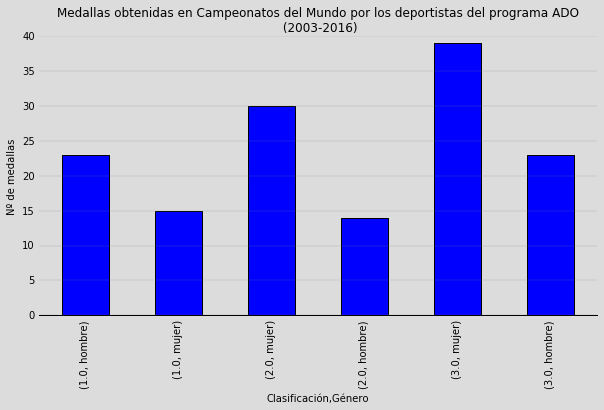

In [54]:
fig, ax = plt.subplots()

fig.set_facecolor('gainsboro')
ax.set_axis_bgcolor('gainsboro')

world_df.groupby('Clasificación')['Género'].value_counts().plot.bar(ax=ax, figsize=(10,5))

ax.yaxis.grid(which='major', color='grey', linestyle='-', linewidth=0.2)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major',
    top='off', 
    left='off',
    right='off',
    bottom='off',
    labelright='off', 
    labeltop='off',
    labelbottom='on')

ax.set_title("Medallas obtenidas en Campeonatos del Mundo por los deportistas del programa ADO\n (2003-2016)")
ax.set_ylabel("Nº de medallas")

plt.savefig("medallas_world.pdf")

In [55]:
# A dataframe for those who have a won medals in European Championships
europe_df = final_df[(final_df['Competición'] == 'Campeonato de Europa') & (final_df['Clasificación'] <= 3)]

In [56]:
europe_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
21,Extremadura,Fátima Gallardo Carapeto,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SW LONDON 2016,2.0,Campeonato de Europa,(0.00),mujer,Natación,Relevos 4 x 200 m Libre Mujeres (Final )
40,Andalucía,Fátima Gálvez Marín,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SH BELGRADO 2011,1.0,Campeonato de Europa,(95),mujer,Tiro Olímpico / Plato ISSF,Tiro al Plato Foso Olímpico (TR75) Mujeres (Fi...
54,Comunidad Valenciana,Iván Pastor Lafuente,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SA BOURGAS 2011,3.0,Campeonato de Europa,(0.0),hombre,Vela,Clases RS:X Hombres (Final )
63,Grecia,Artemi Gavezou Castro,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,GR BAKU 2014,3.0,Campeonato de Europa,(0.0),mujer,Gimnasia / Rítmica,Concurso III Conjuntos 5 Mujeres (Final )
71,Islas Baleares,David Bustos González,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,AT AMSTERDAM 2016,2.0,Campeonato de Europa,(3:46.90),hombre,Atletismo / Pista Aire Libre,Carreras 1.500 m Hombres (Final )


In [57]:
europe_df.to_csv('europe_champs.csv')

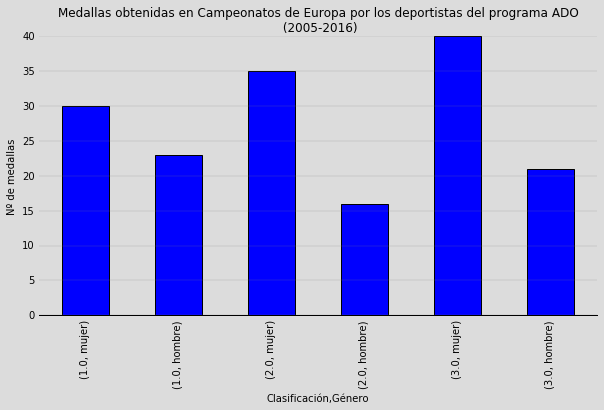

In [58]:
fig, ax = plt.subplots()

fig.set_facecolor('gainsboro')
ax.set_axis_bgcolor('gainsboro')

europe_df.groupby('Clasificación')['Género'].value_counts().plot.bar(ax=ax, figsize=(10,5))

ax.yaxis.grid(which='major', color='grey', linestyle='-', linewidth=0.2)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    which='major',
    top='off', 
    left='off',
    right='off',
    bottom='off',
    labelright='off', 
    labeltop='off',
    labelbottom='on')

ax.set_title("Medallas obtenidas en Campeonatos de Europa por los deportistas del programa ADO\n (2005-2016)")
ax.set_ylabel("Nº de medallas")

plt.savefig("medallas_europe.pdf")

## 4. Going deeper into my analysis

In [59]:
final_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
0,Aragón,María José Povés Novella,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Londres 2012,12.0,JJOO,(01:29:36.01),mujer,Atletismo,Ruta 20 km Marcha Mujeres (Final )
1,Aragón,María José Povés Novella,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Pekín 2008,18.0,JJOO,(1:30:52.0),mujer,Atletismo,Ruta 20 km Marcha Mujeres (Final )
2,Aragón,María José Povés Novella,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,AT ROMA 2016,NaN,Campeonato del mundo,(0.00) DNF,mujer,Atletismo / Ruta,20 km Marcha Mujeres (Final )
3,Aragón,María José Povés Novella,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,AT BEIJING 2015 Ruta,10.0,Campeonato del mundo,(1:31:06.00),mujer,Atletismo / Ruta,20 km Marcha Mujeres (Final )
4,Aragón,María José Povés Novella,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,AT DAEGU 2011,NaN,Campeonato del mundo,(0.00) DQ,mujer,Atletismo,Ruta 20 km Marcha Mujeres (Final )


### Who are the best athletes of each gender?

In [43]:
# Creating a new dataframe for the top athletes
top_df = final_df[final_df['Clasificación'] <= 3]

In [44]:
top_df.head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
6,Cataluña,Paula Ramírez i Ibáñez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SY LONDON 2016,3.0,Campeonato de Europa,(0.0),mujer,Natación / Sincronizada,Equipos Equipos Programa Libre Mujeres (Final )
8,País Vasco,Maialen Chourraut Yurramendi,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,1.0,JJOO,(98.65),mujer,Piragüismo / Slalom,Kayak K1 Mujeres (Final )
9,País Vasco,Maialen Chourraut Yurramendi,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Londres 2012,3.0,JJOO,(106.87),mujer,Piragüismo / Slalom,Kayak K1 Mujeres (Final )
13,País Vasco,Maialen Chourraut Yurramendi,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,CS BRATISLAVA 2011,3.0,Campeonato del mundo,(113.58),mujer,Piragüismo / Slalom,Kayak K1 Mujeres (Final )
14,País Vasco,Maialen Chourraut Yurramendi,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,La Seu d´Urgell 09,2.0,Campeonato del mundo,(107.96),mujer,Piragüismo / Slalom,Kayak K1 Mujeres (Final )


In [45]:
top_female_df = top_df[top_df['Género'] == 'mujer']

In [46]:
top_male_df = top_df[top_df['Género'] == 'hombre']

In [47]:
count_top_female = top_female_df.groupby('Nombre').count().sort_values(by='Clasificación', ascending=False)

In [48]:
count_top_female

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
Nombre,,,,,,,,,
Gemma Mengual Civil,26,26,26,26,26,12,26,26,26
Mireia Belmonte García,23,23,23,23,23,23,23,23,23
Lidia Valentín Pérez,14,14,14,14,14,14,14,14,14
Ruth Beitia Vila,14,14,14,14,14,14,14,14,14
Ona Carbonell Ballestero,12,12,12,12,12,10,12,12,12
Alba María Cabello Rodilla,11,11,11,11,11,6,11,11,11
María Teresa Portela Rivas,9,9,9,9,9,7,9,9,9
Erika Villaécija García,6,6,6,6,6,6,6,6,6
Marina Alabau Neira,6,6,6,6,6,6,6,6,6


In [195]:
# Some descriptive stats
count_top_female.describe()

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
count,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000,50.00000
mean,4.32000,4.32000,4.32000,4.32000,4.32000,3.80000,4.32000,4.32000,4.32000
std,5.35072,5.35072,5.35072,5.35072,5.35072,4.30472,5.35072,5.35072,5.35072
min,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000
25%,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
50%,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
75%,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000,5.00000
max,26.00000,26.00000,26.00000,26.00000,26.00000,23.00000,26.00000,26.00000,26.00000


In [196]:
count_top_female.median()

Nacimiento       2.0
URL              2.0
Campeonato       2.0
Clasificación    2.0
Competición      2.0
Resultado        2.0
Género           2.0
Deporte          2.0
Prueba           2.0
dtype: float64

In [197]:
count_top_female.mode()

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
0,1,1,1,1,1,1,1,1,1


In [198]:
# Checking who the (unknown) second top female athlete is
lidia = top_female_df[top_female_df['Nombre'] == 'Lidia Valentín Pérez']

In [199]:
lidia

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
1595,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,3.0,JJOO,(257),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1601,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WL WROCLAW 2013,3.0,Campeonato del mundo,(122),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1613,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WL TBILISI 2015,1.0,Campeonato de Europa,(263),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1614,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WL TBILISI 2015,1.0,Campeonato de Europa,(118),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1615,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WL TBILISI 2015,1.0,Campeonato de Europa,(145),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1616,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WE TEL-AVID 2014,1.0,Campeonato de Europa,(268),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1617,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WL ANTALYA 2012,2.0,Campeonato de Europa,(260),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1618,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,WL KAZAN 2011,3.0,Campeonato de Europa,(299.0),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1622,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Bucarest 2009,3.0,Campeonato de Europa,(252.0),mujer,Halterofilia,Total Olímpico Hasta 75 kg Mujeres (Total Olím...
1623,Comunidad de Castilla-León,Lidia Valentín Pérez,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Halterofilia Lignano 2008,2.0,Campeonato de Europa,(115.0),mujer,Halterofilia,Arrancada 75 Kg Mujeres (Final )


In [200]:
count_top_male = top_male_df.groupby('Nombre').count().sort_values(by='Clasificación', ascending=False)

In [201]:
count_top_male

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
Nombre,,,,,,,,,
Francisco Javier Gómez Noya,22,22,22,22,22,22,22,22,22
Mario Mola Díaz,11,11,11,11,11,11,11,11,11
Javier Fernández López,9,9,9,9,9,9,9,9,9
Saúl Craviotto Rivero,9,9,9,9,9,9,9,9,9
Alberto Fernández Muñoz,7,7,7,7,7,6,7,7,7
Joel González Bonilla,6,6,6,6,6,6,6,6,6
Iker Martínez de Lizarduy Lizarribar,5,5,5,5,5,2,5,5,5
Josué Brachi García,4,4,4,4,4,4,4,4,4
Fernando Echavarri Erasun,4,4,4,4,4,1,4,4,4


In [202]:
# Some descriptive stats
count_top_male.describe()

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,3.162791,3.162791,3.162791,3.162791,3.162791,2.930233,3.162791,3.162791,3.162791
std,3.823052,3.823052,3.823052,3.823052,3.823052,3.813481,3.823052,3.823052,3.823052
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000
max,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000


In [203]:
count_top_male.median()

Nacimiento       2.0
URL              2.0
Campeonato       2.0
Clasificación    2.0
Competición      2.0
Resultado        2.0
Género           2.0
Deporte          2.0
Prueba           2.0
dtype: float64

In [204]:
count_top_male.mode()

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
0,1,1,1,1,1,1,1,1,1


In [206]:
# Checking who the (unknown) second top male athlete is
mario = top_male_df[top_male_df['Nombre'] == 'Mario Mola Díaz']

In [207]:
mario

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
191,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR WTS HAMBURGO 2016,1.0,Campeonato del mundo,(00:52:19.00),hombre,Triatlón,Individual Hombres (Final )
192,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR WTS YOKOHAMA 2016,1.0,Campeonato del mundo,(1:46:27.00),hombre,Triatlón,Individual Hombres (Final )
194,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR WTS GOLD COAST 2016,1.0,Campeonato del mundo,(1:46:28.00),hombre,Triatlón,Individual Hombres (Final )
195,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR WTS ABU DHABI 2016,1.0,Campeonato del mundo,(1:46:39.00),hombre,Triatlón,Individual Hombres (Final )
196,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR 2015 ITU WTS FINAL - CHICAGO,1.0,Campeonato del mundo,(01:44:53.00),hombre,Triatlón,Individual Hombres (Final )
197,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR 2015 ITU WT SERIES - EDMONTON,3.0,Campeonato del mundo,(00:53:34.00),hombre,Triatlón,Individual Hombres (Final )
199,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR 2015 ITU WT SERIES - HAMBURGO,3.0,Campeonato del mundo,(00:52:20.00),hombre,Triatlón,Individual Hombres (Final )
200,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR 2015 ITU WT SERIES - GOLD COAST,2.0,Campeonato del mundo,(01:47:11.00),hombre,Triatlón,Individual Hombres (Final )
202,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR 2015 ITU WT SERIES - ABU DHABI,1.0,Campeonato del mundo,(52:32.00),hombre,Triatlón,Individual Hombres (Final )
203,Islas Baleares,Mario Mola Díaz,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,TR LONDRES 2013,3.0,Campeonato del mundo,(01:49.10),hombre,Triatlón,Individual Hombres (Final )


### Which is the ratio of medals per gender?

In [208]:
# There are 80 female athletes in this df
(top_female_df.groupby('Clasificación').count())/80

,Nacimiento,Nombre,URL,Campeonato,Competición,Resultado,Género,Deporte,Prueba
Clasificación,,,,,,,,,
1.0,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375,0.6375
2.0,0.9750,0.9750,0.9750,0.9750,0.9750,0.7750,0.9750,0.9750,0.9750
3.0,1.0875,1.0875,1.0875,1.0875,1.0875,0.9625,1.0875,1.0875,1.0875


In [209]:
# There are 91 male athletes in this df
(top_male_df.groupby('Clasificación').count())/91

,Nacimiento,Nombre,URL,Campeonato,Competición,Resultado,Género,Deporte,Prueba
Clasificación,,,,,,,,,
1.0,0.582418,0.582418,0.582418,0.582418,0.582418,0.516484,0.582418,0.582418,0.582418
2.0,0.395604,0.395604,0.395604,0.395604,0.395604,0.395604,0.395604,0.395604,0.395604
3.0,0.516484,0.516484,0.516484,0.516484,0.516484,0.472527,0.516484,0.516484,0.516484


## 3. Adding the information about the grants

In [49]:
# Creating a new df based on the list
becas_df = pd.DataFrame(becas_list)

In [50]:
becas_df.head(10)

,Año,Nombre
0,2016,Julia Figueroa Peña
1,2015,Julia Figueroa Peña
2,2016,Paula Ramírez i Ibáñez
3,2015,Paula Ramírez i Ibáñez
4,2016,Maialen Chourraut Yurramendi
5,2015,Maialen Chourraut Yurramendi
6,2014,Maialen Chourraut Yurramendi
7,2013,Maialen Chourraut Yurramendi
8,2012,Maialen Chourraut Yurramendi
9,2011,Maialen Chourraut Yurramendi


### How many years have the ADO program athletes received a grant?

In [51]:
count_becas = becas_df.groupby('Nombre').count().sort_values(by='Año', ascending=False)

In [52]:
count_becas

,Año
Nombre,
Maialen Chourraut Yurramendi,12
José Antonio Hermida Ramos,12
Ainhoa Murua Zubizarreta,12
Ruth Beitia Vila,12
María Teresa Portela Rivas,12
Saúl Craviotto Rivero,12
Iván Pastor Lafuente,11
Erika Villaécija García,11
Mario Pestano García,11


### How many medals have won the ADO program athletes?

In [53]:
count_top = top_df.groupby('Nombre').count().sort_values(by='Clasificación', ascending=False)

In [54]:
count_top.head()

,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
Nombre,,,,,,,,,
Gemma Mengual Civil,26,26,26,26,26,12,26,26,26
Mireia Belmonte García,23,23,23,23,23,23,23,23,23
Francisco Javier Gómez Noya,22,22,22,22,22,22,22,22,22
Ruth Beitia Vila,14,14,14,14,14,14,14,14,14
Lidia Valentín Pérez,14,14,14,14,14,14,14,14,14


### How many years have the medal-winning athletes received money from the ADO program?

In [55]:
 results_becados_top = pd.merge(count_becas, count_top, left_index=True, right_index=True)

In [56]:
results_becados_top

,Año,Nacimiento,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
Nombre,,,,,,,,,,
Gemma Mengual Civil,8,26,26,26,26,26,12,26,26,26
Mireia Belmonte García,10,23,23,23,23,23,23,23,23,23
Francisco Javier Gómez Noya,11,22,22,22,22,22,22,22,22,22
Ruth Beitia Vila,12,14,14,14,14,14,14,14,14,14
Lidia Valentín Pérez,11,14,14,14,14,14,14,14,14,14
Ona Carbonell Ballestero,8,12,12,12,12,12,10,12,12,12
Mario Mola Díaz,5,11,11,11,11,11,11,11,11,11
Alba María Cabello Rodilla,10,11,11,11,11,11,6,11,11,11
Saúl Craviotto Rivero,12,9,9,9,9,9,9,9,9,9


In [57]:
# Turning the df into a .csv, so that I can then try some other viz outside Python
results_becados_top.to_csv('scatterplot.csv')

### Plotting the correlation between the number of medals won and the number of grant-sponsored years

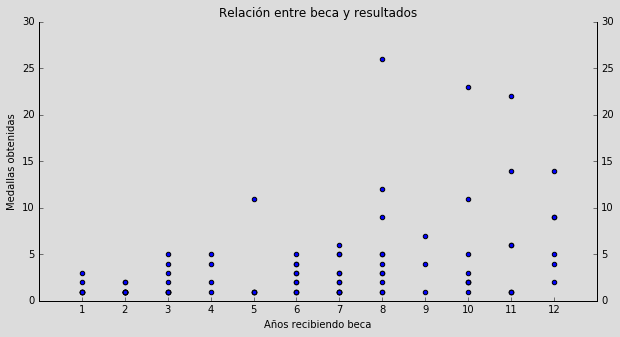

In [223]:
fig, ax = plt.subplots()

fig.set_facecolor('gainsboro')
ax.set_axis_bgcolor('gainsboro')

results_becados_top.plot(kind='scatter', x='Año', y='Nacimiento', ax=ax, figsize=(10,5))

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.tick_params(
    top='off', 
    left='on',
    right='on',
    bottom='on',
    labelright='on', 
    labeltop='off',
    labelbottom='on')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xlim([0,13])
ax.set_ylim([0,30])

ax.set_title("Relación entre beca y resultados")
ax.set_xlabel("Años recibiendo beca")
ax.set_ylabel("Medallas obtenidas")

plt.savefig("scatter-medallas-becas.pdf")

### What % of women have won at least one medal?

In [224]:
(len(count_top_female)/80)*100

62.5

### What % of men have won at least one medal?

In [225]:
(len(count_top_male)/91)*100

47.25274725274725

### Which sports bring home more medals (per gender)?

In [254]:
top_female_df.groupby('Deporte').count().sort_values(by='Nombre', ascending=False).head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Prueba
Deporte,,,,,,,,,
Natación / Sincronizada,63,63,63,63,63,63,42,63,63
Natación,42,42,42,42,42,42,42,42,42
Gimnasia / Rítmica,25,25,25,25,25,25,25,25,25
Halterofilia,14,14,14,14,14,14,14,14,14
Atletismo / Pista Cubierta,10,10,10,10,10,10,10,10,10


In [255]:
top_male_df.groupby('Deporte').count().sort_values(by='Nombre', ascending=False).head()

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Prueba
Deporte,,,,,,,,,
Triatlón,36,36,36,36,36,36,36,36,36
Piragüismo / Aguas Tranquilas,17,17,17,17,17,17,16,17,17
Vela / Vela Ligera,13,13,13,13,13,13,7,13,13
Patinaje sobre Hielo / Artístico,9,9,9,9,9,9,9,9,9
Taekwondo,8,8,8,8,8,8,8,8,8


## 4. Amazing names on the list

In the list of sponsored athletes there are some names linked to rich families.

In [232]:
sergio_resultados = final_df[final_df['Nombre'] == 'Sergio Álvarez Moya']

In [233]:
sergio_resultados

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
1869,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,11.0,JJOO,(0.0) Elim,hombre,Hípica / Saltos de Obstáculos,Equipos Open (Final )
1870,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,20.0,JJOO,(9),hombre,Hípica / Saltos de Obstáculos,Individual Open (Final )
1871,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Aachen 2006,7.0,Campeonato del mundo,None,hombre,Hípica,Saltos Equipos Open (Final )
1872,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Aachen 2006,18.0,Campeonato del mundo,(25.24) Elim,hombre,Hípica,Saltos Individual Open (Calificación )
1873,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,EJ Aachen 2015,6.0,Campeonato de Europa,(0.0),hombre,Hípica / Saltos de Obstáculos,Equipos Open (Final )
1874,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,EJ Aachen 2015,6.0,Campeonato de Europa,(9.47),hombre,Hípica / Saltos de Obstáculos,Individual Open (Final )
1875,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Saltos Mannheim 2007,8.0,Campeonato de Europa,None,hombre,Hípica,Saltos Equipos Open (Final )
1876,Asturias,Sergio Álvarez Moya,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Saltos Mannheim 2007,16.0,Campeonato de Europa,(26.09),hombre,Hípica,Saltos Individual Open (Final )


In [234]:
sergio_beca = becas_df[becas_df['Nombre'] == 'Sergio Álvarez Moya']

In [235]:
sergio_beca

,Año,Nombre
780,2016,Sergio Álvarez Moya
781,2007,Sergio Álvarez Moya


In [244]:
botin_resultados = final_df[final_df['Nombre'] == 'Diego Botín Sanz de Sautuola Le Chever']

In [245]:
botin_resultados

,Nacimiento,Nombre,URL,Campeonato,Clasificación,Competición,Resultado,Género,Deporte,Prueba
424,Comunidad de Madrid,Diego Botín Sanz de Sautuola Le Chever,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,Río 2016,9.0,JJOO,(0.0),hombre,Vela / Vela Ligera,Skiff 49er Hombres (Regata )
425,Comunidad de Madrid,Diego Botín Sanz de Sautuola Le Chever,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SA 49er FLORIDA 2016,11.0,Campeonato del mundo,(0.0),hombre,Vela / Vela Ligera,Skiff 49er Hombres (Final )
426,Comunidad de Madrid,Diego Botín Sanz de Sautuola Le Chever,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SA 49er BUENOS AIRES 2015,9.0,Campeonato del mundo,(0.0),hombre,Vela / Vela Ligera,Skiff 49er Hombres (Final )
427,Comunidad de Madrid,Diego Botín Sanz de Sautuola Le Chever,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SA SANTANDER 2014,37.0,Campeonato del mundo,(0.0),hombre,Vela / Vela Ligera,Skiff 49er Hombres (Final )
428,Comunidad de Madrid,Diego Botín Sanz de Sautuola Le Chever,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SA 49er BARCELONA 2016,1.0,Campeonato de Europa,(0.0),hombre,Vela / Vela Ligera,Skiff 49er Hombres (Final )
429,Comunidad de Madrid,Diego Botín Sanz de Sautuola Le Chever,http://www.coe.es/coe/bd_perso.nsf/becadosHTML...,SA 49er OPORTO 2015,26.0,Campeonato de Europa,(0.0),hombre,Vela / Vela Ligera,Skiff 49er Hombres (Final )


In [246]:
botin_becas = becas_df[becas_df['Nombre'] == 'Diego Botín Sanz de Sautuola Le Chever']

In [247]:
botin_becas

,Año,Nombre
168,2016,Diego Botín Sanz de Sautuola Le Chever
